In [1]:
import pandas as pd
import numpy as np
import csv
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import statistics
import seaborn as sns

df =pd.read_csv('weatherAUS.csv')
df_states=pd.read_csv('aus_cities.csv', index_col=0)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [2]:
df.set_index('Date')

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [3]:
df =pd.read_csv('weatherAUS.csv')
df = pd.DataFrame(df, columns = ['Date', 'Location', 'WindGustSpeed', 'MaxTemp'])
syd_humid = df.loc[df['Location'] == 'Sydney']
syd_humid.set_index('Date')

,Location,WindGustSpeed,MaxTemp
Date,,,
2008-02-01,Sydney,NaN,22.4
2008-02-02,Sydney,NaN,25.6
2008-02-03,Sydney,NaN,24.5
2008-02-04,Sydney,NaN,22.8
2008-02-05,Sydney,NaN,25.7
...,...,...,...
2017-06-21,Sydney,37.0,19.6
2017-06-22,Sydney,30.0,19.2
2017-06-23,Sydney,24.0,17.7


In [4]:
df = pd.DataFrame(df, columns = ['Date', 'Location', 'WindGustSpeed', 'MaxTemp'])
ade_humid = df.loc[df['Location'] == 'Adelaide']
ade_humid.set_index('Date')

,Location,WindGustSpeed,MaxTemp
Date,,,
2008-07-01,Adelaide,48.0,15.7
2008-07-02,Adelaide,35.0,15.8
2008-07-03,Adelaide,20.0,15.1
2008-07-04,Adelaide,30.0,15.9
2008-07-05,Adelaide,30.0,15.4
...,...,...,...
2017-06-21,Adelaide,17.0,19.2
2017-06-22,Adelaide,22.0,19.5
2017-06-23,Adelaide,19.0,18.5


In [5]:
df = pd.DataFrame(df, columns = ['Date', 'Location', 'WindGustSpeed', 'MaxTemp'])
mel_humid = df.loc[df['Location'] == 'Melbourne']
mel_humid.set_index('Date')
#create series 2017-02-01 -- 2017-02-28

,Location,WindGustSpeed,MaxTemp
Date,,,
2008-07-01,Melbourne,63.0,15.4
2008-07-02,Melbourne,63.0,14.5
2008-07-03,Melbourne,39.0,14.1
2008-07-04,Melbourne,19.0,14.5
2008-07-05,Melbourne,52.0,15.5
...,...,...,...
2017-06-21,Melbourne,24.0,13.5
2017-06-22,Melbourne,24.0,14.1
2017-06-23,Melbourne,44.0,14.9


Text(0.5, 0.98, 'Sydney')

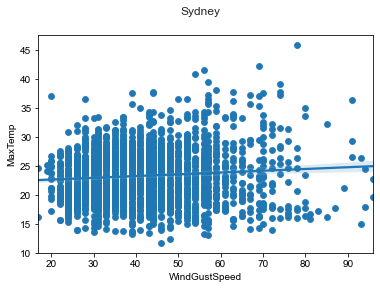

In [6]:
#Sydney wind vs temp
syd_humid.plot.scatter(x='WindGustSpeed', y='MaxTemp')
sns.set_style('white')
sns.set_style('ticks')
sns.regplot(x='WindGustSpeed', y='MaxTemp', data=syd_humid)
plt.suptitle("Sydney")
#slice series by index

Text(0.5, 0.98, 'Adelaide')

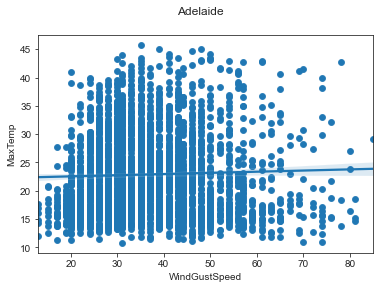

In [7]:
#Adelaide wind vs temp
ade_humid.plot.scatter(x='WindGustSpeed', y='MaxTemp')
sns.set_style('white')
sns.set_style('ticks')
sns.regplot(x='WindGustSpeed', y='MaxTemp', data=ade_humid)
plt.suptitle("Adelaide")

Text(0.5, 0.98, 'Melbourne')

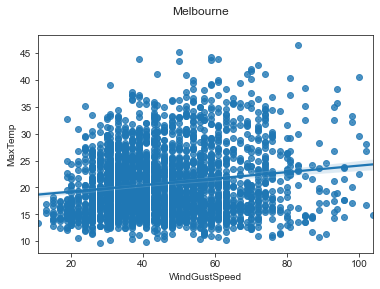

In [12]:
#Melbourne wind vs temp
mel_humid.plot.scatter(x='WindGustSpeed', y='MaxTemp', s=.05)
sns.set_style('white')
sns.set_style('ticks')
sns.regplot(x='WindGustSpeed', y='MaxTemp', data=mel_humid)
plt.suptitle("Melbourne")

In [ ]:
#smaller dot size